In [28]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'

df = pd.read_csv(url)
df.head(5)

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


# Understanding the data


In [29]:
df.shape

(7043, 18)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

# Manipulating and changing data


In [31]:
df_modified = df.copy()
troca = {'Sim':1,'Nao':0}

df_modified = df_modified[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(troca)
df_modified.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [32]:
dummie_df = pd.get_dummies(df.drop(['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn'],axis=1))

df_final = pd.concat([df_modified,dummie_df],axis=1)

In [33]:
df_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


pd.set_option('display.max_columns',39)  #Define número máximo de colunas para visualização

In [35]:
df_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


# Initial steps

In [47]:
Xtest = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1]]


# Visualising

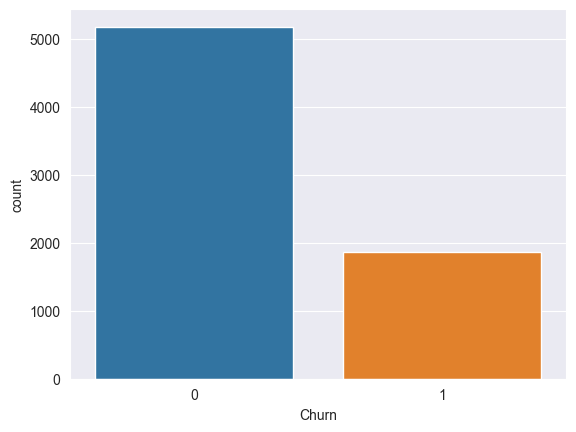

In [37]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=df_final)

In [ ]:
'''Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.'''

In [38]:
# Para podermos aplicar o SMOTE, devemos separar os dados em variáveis características e resposta

X = df_final.drop('Churn', axis = 1)
y = df_final['Churn']

In [39]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [40]:
df_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


<AxesSubplot: xlabel='Conjuge', ylabel='Dependentes'>

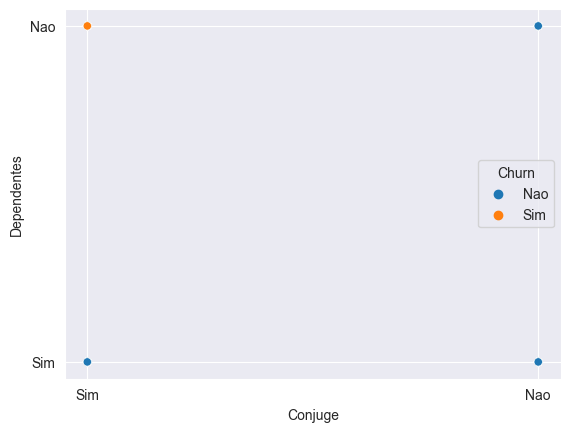

In [66]:
x = X
sns.scatterplot(x='Conjuge',y='Dependentes',hue='Churn',data=df)

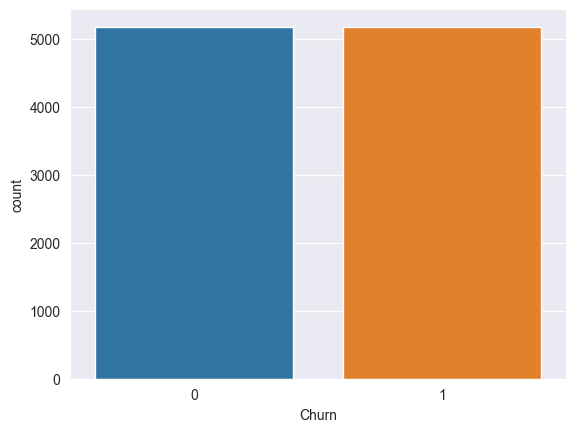

In [42]:
ax1 = sns.countplot(x='Churn', data=df_final)

# KNN

In [43]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
         2.08580171, -0.4360152 ],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30373042,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76702973,
        -0.47943196, -0.4360152 ]])

In [48]:
#Normalizando test
Xtest_normalized = norm.transform(pd.DataFrame(Xtest,columns = X.columns))
Xtest_normalized

array([[-0.79024667, -0.52756038,  0.32670777,  0.81514931, -0.41254225,
        -1.14935017, -0.9723572 ,  1.1299503 , -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598, -1.15193837, -0.44617598,
        -0.51751958,  1.04326198,  2.24126814,  1.57389661, -0.95871762,
        -0.44617598,  1.55771951,  0.87997069, -0.44617598, -0.52426638,
        -0.84252477, -0.44617598,  1.28687897, -0.83133988, -0.44617598,
         1.26568609, -0.44648735, -1.35550751, -0.41989297,  2.34869598,
         1.30373042,  2.08580171,  2.293498  ]])

In [50]:
import numpy as np

In [53]:
a = Xtest_normalized
b = X_normalizado[0]
a - b #Subtração dos vizinhos

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.04166352,  0.34941285,  2.01494498, -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        , -2.02004037,  0.        ,
         0.        ,  2.00179399,  2.68744412,  0.        , -2.00177762,
         0.        ,  2.19968361,  0.        ,  0.        ,  0.        ,
        -2.0294335 ,  0.        ,  2.06395283, -2.03421733,  0.        ,
         2.05577141,  0.        , -2.09323857,  0.        ,  2.77446415,
         0.        ,  2.56523367,  2.72951321]])

In [54]:
np.square(a-b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73584854e-03, 1.22089340e-01, 4.06000326e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 4.08056308e+00, 0.00000000e+00, 0.00000000e+00,
        4.00717917e+00, 7.22235589e+00, 0.00000000e+00, 4.00711364e+00,
        0.00000000e+00, 4.83860797e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.11860031e+00, 0.00000000e+00, 4.25990126e+00,
        4.13804017e+00, 0.00000000e+00, 4.22619609e+00, 0.00000000e+00,
        4.38164773e+00, 0.00000000e+00, 7.69765133e+00, 0.00000000e+00,
        6.58042377e+00, 7.45024235e+00]])

In [55]:
np.sum(np.square(a-b))

107.87561071126902

In [56]:
np.sqrt(np.sum(np.square(a-b)))

10.38631843875726

## KNN model

In [128]:
from sklearn.model_selection import train_test_split
seed = 42
np.random.seed(seed)
X_train, X_test, y_train, y_test = train_test_split(X_normalizado,y, test_size = 0.3)

In [129]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric = 'euclidean')

In [130]:
model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [131]:
from sklearn.metrics import accuracy_score

previsoes = model.predict(X_test)
acuracia_modelo = accuracy_score(y_test, previsoes)*100
print(f'Acurácia do modelo: {round(acuracia_modelo, 2)}%')

Acurácia do modelo: 82.64%


## Baseline

In [90]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(X_train,y_train)
previsoes = dummy.predict(X_test)
acuracia_dummy = dummy.score(X_test,y_test)*100
print(f'Acurácia de baseline: {round(acuracia_dummy,2)}%')

Acurácia de baseline: 49.31%


In [94]:
# Ganho proporcional em relação a baseline

ganho_modelo = round((acuracia_modelo - acuracia_dummy),2)
print(f'Ganho em relação a baselinhe: {ganho_modelo}%')

Ganho em relação a baselinhe: 33.33%


In [104]:
def euclidean_distance(xpto, ypto):
    return np.sqrt(np.sum(np.square(xpto-ypto)))

#Xtest_normalized
distances = [euclidean_distance(Xtest_normalized, neighbor) for neighbor in X_normalizado[:10]]

distances.sort()
distances

[7.410402840537177,
 8.308779687106574,
 8.434722244887189,
 8.547030666102588,
 8.695513536575996,
 8.79725376340694,
 9.746742121766927,
 10.38631843875726,
 10.416133827767748,
 10.744748552237771]

# Probabilistic method

In [117]:
np.median(X_train)

-0.4461759755508453

In [119]:
from sklearn.naive_bayes import BernoulliNB
median = abs(np.median(X_train))
model_bnb = BernoulliNB(binarize = median)

model_bnb.fit(X_train, y_train)
previsoes_bnb = model_bnb.predict(X_test)
acuracia_modelo_bnb = accuracy_score(y_test, previsoes_bnb)*100
print(f'Acurácia do modelo: {round(acuracia_modelo, 2)}%')

ganho_modelo_bnb = round((acuracia_modelo_bnb - acuracia_dummy),2)
print(f'Ganho em relação a baselinhe: {ganho_modelo_bnb}%')

Acurácia do modelo: 82.64%
Ganho em relação a baselinhe: 28.86%


# Symbolic method

In [137]:
from sklearn.tree import DecisionTreeClassifier



modelo = DecisionTreeClassifier(criterion='entropy', max_depth=3)
modelo.fit(X_train,y_train)
prev = modelo.predict(X_test)

acuracia_modelo_tree= accuracy_score(y_test, prev)*100
print(f'Acurácia do modelo: {round(acuracia_modelo_tree, 2)}%')

ganho_modelo_tree = round((acuracia_modelo_tree - acuracia_dummy),2)
print(f'Ganho em relação a baselinhe: {ganho_modelo_tree}%')

Acurácia do modelo: 79.36%
Ganho em relação a baselinhe: 30.05%


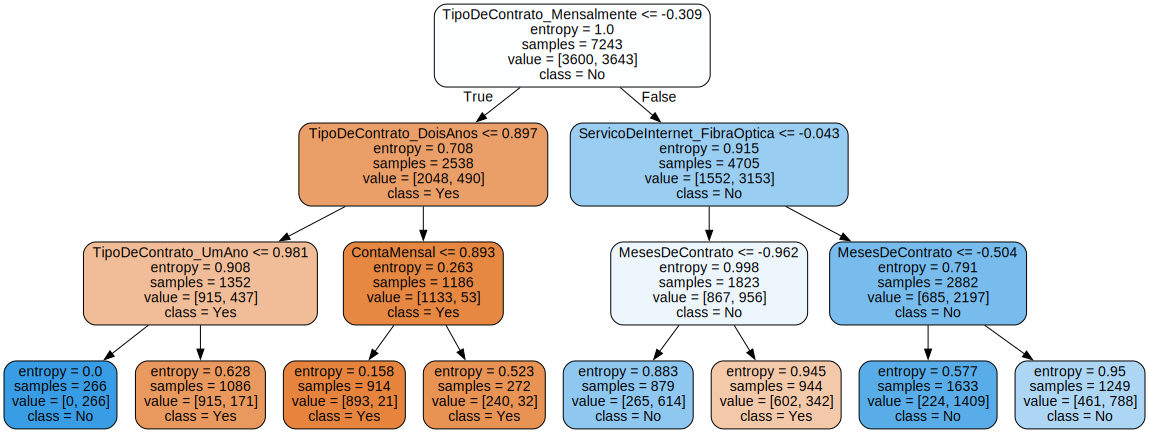

In [138]:

from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, feature_names=features,
                           class_names=['Yes', 'No'])
grafico = graphviz.Source(dot_data)
grafico

# Model validation

In [133]:
from sklearn.metrics import confusion_matrix

print(f'Matriz de confusão KNN: ')
print(confusion_matrix(y_test, previsoes))

Matriz de confusão KNN: 
[[1247  327]
 [ 212 1319]]


In [134]:
print('Matriz de confusão: BNB: ')
print(confusion_matrix(y_test, previsoes_bnb))

Matriz de confusão: BNB: 
[[1106  468]
 [ 210 1321]]


In [139]:
print('Matriz de confusão Tree: ')
print(confusion_matrix(y_test, prev))

Matriz de confusão Tree: 
[[1168  406]
 [ 235 1296]]


In [146]:
from sklearn.metrics import precision_score

print(f'Precisão KNN: ')
print(f'{round(precision_score(y_test, previsoes),2)*100}%')
print('Precisão BNB: ')
print(f'{round(precision_score(y_test, previsoes_bnb),2)*100}%')
print('Precisão Tree: ')
print(f'{round(precision_score(y_test, prev),2)*100}%')


Precisão KNN: 
80.0%
Precisão BNB: 
74.0%
Precisão Tree: 
76.0%


In [147]:
from sklearn.metrics import recall_score

print(f'Recall KNN: ')
print(f'{round(recall_score(y_test, previsoes),2)*100}%')
print('Recall BNB: ')
print(f'{round(recall_score(y_test, previsoes_bnb),2)*100}%')
print('Recall Tree: ')
print(f'{round(recall_score(y_test, prev),2)*100}%')


Recall KNN: 
86.0%
Recall BNB: 
86.0%
Recall Tree: 
85.0%


In [148]:
from sklearn.metrics import f1_score

print(f'f1 score KNN: ')
print(f'{round(f1_score(y_test, previsoes),2)*100}%')
print('f1 score BNB: ')
print(f'{round(f1_score(y_test, previsoes_bnb),2)*100}%')
print('f1 score Tree: ')
print(f'{round(f1_score(y_test, prev),2)*100}%')

f1 score KNN: 
83.0%
f1 score BNB: 
80.0%
f1 score Tree: 
80.0%


In [156]:
# AUC Area under the curve
from sklearn import metrics
print(f'AUC KNN: ')
print(f'{round(metrics.roc_auc_score(y_test, previsoes),2)}')
print('AUC BNB: ')
print(f'{round(metrics.roc_auc_score(y_test, previsoes_bnb),2)}')
print('AUC Tree: ')
print(f'{round(metrics.roc_auc_score(y_test, prev),2)}')


AUC KNN: 
0.83
AUC BNB: 
0.78
AUC Tree: 
0.79


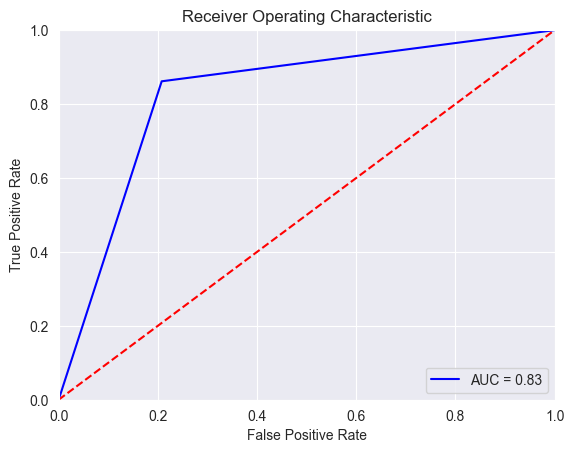

In [159]:
# KNN
fpr, tpr, threshold = metrics.roc_curve(y_test, previsoes)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

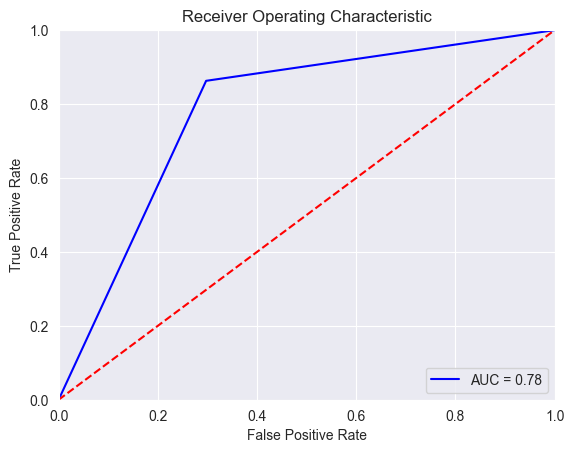

In [160]:
# BNB
fpr, tpr, threshold = metrics.roc_curve(y_test, previsoes_bnb)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

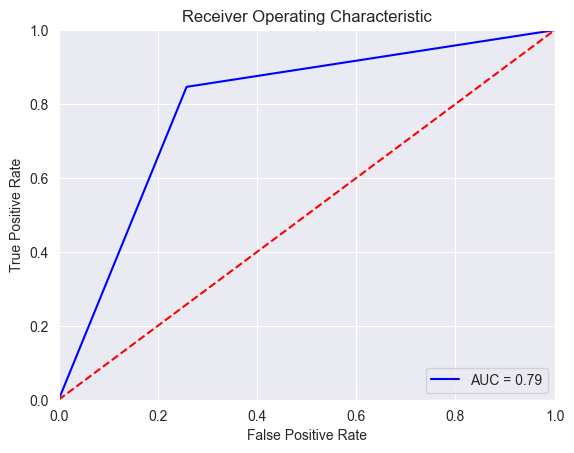

In [161]:
# KNN
fpr, tpr, threshold = metrics.roc_curve(y_test, prev)
roc_auc = metrics.auc(fpr, tpr)
# method I: plt

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [162]:
# Teste

predito = [0,0,0,0,1,1,1,1,0,1,0,1]
real = [1,1,0,0,1,1,1,0,1,0,1,0]

print(recall_score(real,predito))
print(f1_score(real,predito))

0.42857142857142855
0.4615384615384615
